# k-Means and EM algorithm

## Initialization

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [263]:
def plot(points, labels):
    plt.axis([0, 10, 0, 10])
    plt.scatter(points[:, 0], points[:, 1], c=labels, s=100)
    plt.show()

In [264]:
def log(points, labels):
    unique_labels = np.unique(labels)
    means = np.zeros(shape=(len(unique_labels), 2))
    for label in unique_labels:
        # Get mask to select points that have this label
        mask = (labels == label)
        # Calculate the center of all those points
        # (Manhattan distance) using the average
        means[label] = np.average(points[mask], axis=0)
    
    for i, mean in enumerate(means):
        print("Mean %d: %s" % (i, mean))

    print("\nPoint\t\tLabel")
    for i, p in enumerate(points):
        print("(%.2f, %.2f):\t%d" % (p[0], p[1], labels[i]))

## Algorithm

In [265]:
def iterate_k_means(points, labels):
    unique_labels = np.unique(labels)
    means = np.zeros(shape=(len(unique_labels), 2))

    for label in unique_labels:
        # Get mask to select points that have this label
        mask = labels == label
        # Calculate the center of all those points
        # (Manhattan distance) using the average
        means[label] = np.average(points[mask], axis=0)
        
    distances = np.ndarray(shape=(len(unique_labels), len(points)))
    for i, mean in enumerate(means):
        # For each mean calculate an array with its distance to each point
        distances[i] = abs(points - mean).sum(axis=1)

    # Get the minimum distance for each point
    min_distances = distances.min(axis=0)

    # Get an array of masks (for each) label by
    # checking where the min_distance of each point is
    masks = (distances == min_distances)

    # Generate new labels by writing the label number
    # where the mask says 'True'
    # labels = np.array(shape=(len(points), 1), dtype=int)
    for i, mask in enumerate(masks):
        labels[mask] = i

    return labels

## Initial partitioning

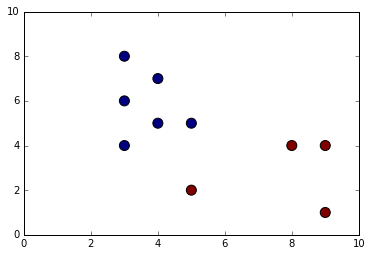

Mean 0: [ 3.66666667  5.83333333]
Mean 1: [ 7.75  2.75]

Point		Label
(3.00, 8.00):	0
(4.00, 7.00):	0
(3.00, 6.00):	0
(3.00, 4.00):	0
(4.00, 5.00):	0
(5.00, 5.00):	0
(5.00, 2.00):	1
(8.00, 4.00):	1
(9.00, 4.00):	1
(9.00, 1.00):	1


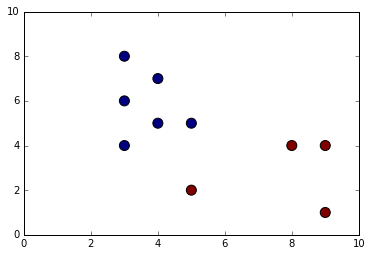

Mean 0: [ 3.66666667  5.83333333]
Mean 1: [ 7.75  2.75]

Point		Label
(3.00, 8.00):	0
(4.00, 7.00):	0
(3.00, 6.00):	0
(3.00, 4.00):	0
(4.00, 5.00):	0
(5.00, 5.00):	0
(5.00, 2.00):	1
(8.00, 4.00):	1
(9.00, 4.00):	1
(9.00, 1.00):	1


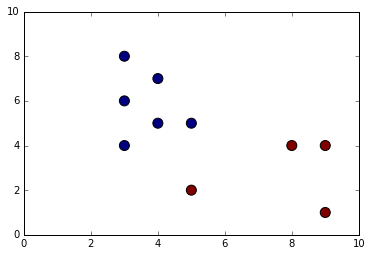

Mean 0: [ 3.66666667  5.83333333]
Mean 1: [ 7.75  2.75]

Point		Label
(3.00, 8.00):	0
(4.00, 7.00):	0
(3.00, 6.00):	0
(3.00, 4.00):	0
(4.00, 5.00):	0
(5.00, 5.00):	0
(5.00, 2.00):	1
(8.00, 4.00):	1
(9.00, 4.00):	1
(9.00, 1.00):	1


In [266]:
points = np.array([[3, 8], [4, 7], [3, 6], [3, 4], [4, 5], [5, 5], [5, 2], [8, 4], [9, 4], [9, 1]])
labels = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

labels = iterate_k_means(points, labels)
plot(points, labels)
log(points, labels)

labels = iterate_k_means(points, labels)
plot(points, labels)
log(points, labels)

labels = iterate_k_means(points, labels)
plot(points, labels)
log(points, labels)